# 0. Data loading

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.graph_objects as go

In [ ]:
!wget -O asa_cw1_data.zip "https://drive.google.com/uc?export=download&id=1E17e_pf7mu7_cYYh1SaqaOlLPi7jydYR"
!unzip asa_cw1_data.zip
!ls

--2024-03-08 11:45:35--  https://drive.google.com/uc?export=download&id=1E17e_pf7mu7_cYYh1SaqaOlLPi7jydYR
Resolving drive.google.com (drive.google.com)... 142.251.161.100, 142.251.161.102, 142.251.161.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.161.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1E17e_pf7mu7_cYYh1SaqaOlLPi7jydYR&export=download [following]
--2024-03-08 11:45:35--  https://drive.usercontent.google.com/download?id=1E17e_pf7mu7_cYYh1SaqaOlLPi7jydYR&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14111474 (13M) [application/octet-stream]
Saving to: ‘asa_cw1_data.zip’

asa_cw1_data.zip    100%[===================>]  13.46M  

In [ ]:
# Load in the data
filename1 = "asa_cw1_data/baskets_sample.csv"
filename2 = "asa_cw1_data/category_spends_sample.csv"
filename3 = "asa_cw1_data/customers_sample.csv"
filename4 = "asa_cw1_data/lineitems_sample.csv"

baskets_sample = pd.read_csv(filename1)
category_spends_sample = pd.read_csv(filename2)
customers_sample = pd.read_csv(filename3)
lineitems_sample = pd.read_csv(filename4)

In [ ]:
# Individual visit made by the 3000 customers in the sample.
baskets_sample.head(3)

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,£3.09,3
1,4047,2007-03-01 07:13:00,9,£7.99,5
2,3571,2007-03-01 07:27:00,9,£37.06,6


In [ ]:
# Customers' spend over the period into 20 item categories
category_spends_sample.head(3)

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
0,11387,£64.58,£35.91,£107.78,£27.08,£29.59,£0.00,£54.83,£6.35,£22.83,...,£28.62,£162.10,£28.02,£28.12,£28.54,£2.00,£15.00,£7.48,£0.00,£0.84
1,8171,£16.89,£37.24,£28.84,£33.43,£66.40,£0.00,£22.06,£12.09,£2.34,...,£26.44,£0.00,£8.42,£2.65,£3.76,£0.00,£0.00,£9.99,£0.00,£0.00
2,1060,£87.30,£82.98,£49.88,£20.57,£37.04,£0.00,£9.85,£57.98,£31.12,...,£54.65,£0.00,£0.00,£2.60,£0.00,£18.00,£20.00,£106.46,£0.00,£0.00


In [ ]:
# A summary file detailing the consumer behaviour of 3000 customers (referenced by an anonymized but consistent “customer_number”)
customers_sample.head(3)

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
0,4749,220,260,1.181818,£631.12,£2.87
1,4757,248,333,1.342742,£452.42,£1.82
2,144,226,303,1.340708,£261.16,£1.16


In [ ]:
# A final dataset is also available for use that breaks down each basket into its individual product purchase ids, along with category the item belongs to.
lineitems_sample.head(3)

,customer_number,purchase_time,product_id,category,quantity,spend
0,14577,2007-03-10 11:58:00,722653,GROCERY_FOOD,1,£1.39
1,7210,2007-03-22 10:53:00,696136,GROCERY_HEALTH_PETS,1,£4.25
2,3145,2007-03-26 11:17:00,139543,GROCERY_HEALTH_PETS,1,£0.50


# 1. Initial Data Cleaning and Transformation

## 1.1. Checking for missing values

Data from baskets_sample and category_spends_sample tables will be use for analysis. Upon checking, there is no missing value found in these 2 tables:

In [ ]:
print(baskets_sample.isnull().sum())
print(category_spends_sample.isnull().sum())

customer_number      0
purchase_time        0
basket_quantity      0
basket_spend         0
basket_categories    0
dtype: int64
customer_number         0
fruit_veg               0
dairy                   0
confectionary           0
grocery_food            0
grocery_health_pets     0
bakery                  0
newspapers_magazines    0
prepared_meals          0
soft_drinks             0
frozen                  0
meat                    0
tobacco                 0
drinks                  0
deli                    0
world_foods             0
lottery                 0
cashpoint               0
seasonal_gifting        0
discount_bakery         0
practical_items         0
dtype: int64


## 1.2. Formatting data

In [ ]:
# Convert purchase_time and basket_spend in the table baskets_sample to suitable format
baskets_sample['purchase_time'] = pd.to_datetime(baskets_sample['purchase_time'])
baskets_sample['basket_spend'] = baskets_sample['basket_spend'].str.replace('£', '')
baskets_sample['basket_spend'] = baskets_sample['basket_spend'].astype('float')
baskets_sample.head()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1


In [ ]:
# Convert the product spends in the table category_spends_sample to suitable format
columns_to_process = category_spends_sample.columns[category_spends_sample.columns != 'customer_number']
category_spends_sample[columns_to_process] = category_spends_sample[columns_to_process].apply(lambda x: x.str.replace('£', '').str.replace(',', '').astype(float))
category_spends_sample = pd.concat([category_spends_sample[columns_to_process], category_spends_sample['customer_number']], axis=1)
category_spends_sample.head()

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,customer_number
0,64.58,35.91,107.78,27.08,29.59,0.0,54.83,6.35,22.83,21.51,...,162.1,28.02,28.12,28.54,2.0,15.0,7.48,0.0,0.84,11387
1,16.89,37.24,28.84,33.43,66.40,0.0,22.06,12.09,2.34,78.74,...,0.0,8.42,2.65,3.76,0.0,0.0,9.99,0.0,0.00,8171
2,87.30,82.98,49.88,20.57,37.04,0.0,9.85,57.98,31.12,14.53,...,0.0,0.00,2.60,0.00,18.0,20.0,106.46,0.0,0.00,1060
3,84.05,186.56,175.50,119.84,111.08,0.0,13.05,25.54,124.42,15.24,...,127.7,0.00,0.00,0.00,4.0,0.0,0.00,0.0,4.50,3728
4,35.16,121.31,79.23,29.03,37.17,0.0,40.06,0.00,4.68,3.33,...,0.0,2.55,99.16,0.00,0.0,0.0,3.40,0.0,0.00,14621


## 1.3.Checking for negative values

First, we generate some summary statistics for baskets_sample and category_spends_sample tables:

In [ ]:
baskets_sample.describe()

,customer_number,basket_quantity,basket_spend,basket_categories
count,195547.000000,195547.000000,195547.000000,195547.000000
mean,7896.492899,8.955218,11.804010,4.231990
std,4408.251411,9.510890,13.031542,2.478016
min,14.000000,-11.000000,-98.400000,1.000000
25%,4323.000000,3.000000,4.280000,2.000000
50%,7944.000000,6.000000,8.130000,4.000000
75%,11324.000000,11.000000,14.480000,6.000000
max,16316.000000,190.000000,377.280000,16.000000


In [ ]:
category_spends_sample.describe()

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,customer_number
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.00000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,69.456163,71.302683,57.347793,60.007530,60.909867,0.0,16.653390,35.48057,23.303350,35.466020,...,92.547613,62.242217,13.736440,8.554260,14.165603,45.330583,6.126987,1.814837,2.016220,8095.724333
std,70.499654,57.966265,55.959350,57.682533,69.805023,0.0,26.377091,41.24047,35.695592,41.477609,...,201.703812,121.500365,25.486136,14.757745,48.469754,123.584361,13.104271,9.450367,4.322232,4686.259488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,22.695000,31.390000,21.070000,21.087500,18.145000,0.0,1.500000,8.70000,3.750000,8.777500,...,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,4044.750000
50%,50.935000,56.875000,42.290000,44.030000,39.075000,0.0,7.345000,23.09500,11.685000,22.275000,...,2.030000,12.830000,3.495000,3.760000,0.000000,0.000000,1.990000,0.000000,0.000000,8218.500000
75%,93.405000,95.327500,75.125000,80.922500,77.250000,0.0,19.687500,47.33000,28.782500,47.237500,...,81.030000,65.150000,15.770000,10.647500,6.000000,30.000000,6.720000,0.000000,2.510000,12115.500000
max,1262.970000,708.040000,614.370000,1017.070000,884.450000,0.0,351.730000,454.29000,529.650000,385.800000,...,2488.940000,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,16316.000000


There are negative values in several features: basket_quantity and basket_spend (baskets_sample) or lottery (category_spends_sample). We will look up rows with negative quantity in the lineitems_sample table and their corresponding categories to check for possible patterns.

In [ ]:
neg_qty = lineitems_sample[lineitems_sample['quantity'] < 0]
neg_qty.category.unique()

array(['LOTTERY', 'GROCERY_HEALTH_PETS', 'SOFT_DRINKS', 'DRINKS',
       'CONFECTIONARY', 'DELI', 'MEAT'], dtype=object)

The negative quantity and spend came from several product categories. There could be several reasons for this: claiming winning lottery tickets, returned transactions, or erroneous data entry. To ensure precise segmentation later, entries with negative quantities and spends will be excluded from the baskets_sample and category_spends_sample table.

In [ ]:
# Convert the features in the table category_spends_sample to suitable format
lineitems_sample['spend'] = lineitems_sample['spend'].str.replace('£', '')
lineitems_sample['spend'] = lineitems_sample['spend'].astype('float')
lineitems_sample['purchase_time'] = pd.to_datetime(lineitems_sample['purchase_time'])

# Define categories with negative quantities
negative_categories = ['LOTTERY', 'GROCERY_HEALTH_PETS', 'SOFT_DRINKS', 'DRINKS', 'CONFECTIONARY', 'DELI', 'MEAT']

# Define a dictionary to map category names to corresponding column names in category_spends_sample
category_mapping = {
    'LOTTERY': 'lottery',
    'GROCERY_HEALTH_PETS': 'grocery_health_pets',
    'SOFT_DRINKS': 'soft_drinks',
    'DRINKS': 'drinks',
    'CONFECTIONARY': 'confectionary',
    'DELI': 'deli',
    'MEAT': 'meat'}

# Find negative quantity entries for the specified categories
neg_qty = lineitems_sample[lineitems_sample['quantity'] < 0]
neg_qty = neg_qty[neg_qty['category'].isin(negative_categories)]

# Group by customer_number and purchase_time
neg_qty_grouped = neg_qty.groupby(['customer_number', 'purchase_time']).agg({'quantity': 'sum', 'spend': 'sum'})

# Subtract negative quantities from baskets_sample
for index, row in neg_qty_grouped.iterrows():
    customer_number, purchase_time = index
    negative_quantity = row['quantity']
    negative_spend = row['spend']
    basket_index = (baskets_sample['customer_number'] == customer_number) & (baskets_sample['purchase_time'] == purchase_time)
    baskets_sample.loc[basket_index, 'basket_quantity'] -= negative_quantity
    baskets_sample.loc[basket_index, 'basket_spend'] -= negative_spend

# Update category_spends_sample by subtracting negative spends
for index, row in neg_qty_grouped.iterrows():
    customer_number = index[0]
    negative_spend = row['spend']
    for category in negative_categories:
        category_spends_sample.loc[category_spends_sample['customer_number'] == customer_number, category_mapping[category]] -= negative_spend

In [ ]:
# Check again
category_spends_sample.describe()

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,customer_number
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.00000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,69.456163,71.302683,59.050540,60.007530,62.612613,0.0,16.653390,35.48057,25.006097,35.466020,...,92.547613,63.944963,15.439187,8.554260,15.868350,45.330583,6.126987,1.814837,2.016220,8095.724333
std,70.499654,57.966265,57.297584,57.682533,71.105051,0.0,26.377091,41.24047,37.791030,41.477609,...,201.703812,122.250092,28.024544,14.757745,53.754187,123.584361,13.104271,9.450367,4.322232,4686.259488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,22.695000,31.390000,21.780000,21.087500,18.987500,0.0,1.500000,8.70000,4.280000,8.777500,...,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,4044.750000
50%,50.935000,56.875000,43.390000,44.030000,41.750000,0.0,7.345000,23.09500,12.825000,22.275000,...,2.030000,15.000000,4.265000,3.760000,0.000000,0.000000,1.990000,0.000000,0.000000,8218.500000
75%,93.405000,95.327500,77.385000,80.922500,78.620000,0.0,19.687500,47.33000,30.455000,47.237500,...,81.030000,68.380000,18.525000,10.647500,7.000000,30.000000,6.720000,0.000000,2.510000,12115.500000
max,1262.970000,708.040000,614.370000,1017.070000,884.450000,0.0,351.730000,454.29000,529.650000,385.800000,...,2488.940000,1005.330000,375.730000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,16316.000000


In [ ]:
# Check again
baskets_sample.describe()

,customer_number,basket_quantity,basket_spend,basket_categories
count,195547.000000,195547.000000,195547.000000,195547.000000
mean,7896.492899,8.960250,11.830133,4.231990
std,4408.251411,9.509442,13.023371,2.478016
min,14.000000,0.000000,0.000000,1.000000
25%,4323.000000,3.000000,4.300000,2.000000
50%,7944.000000,6.000000,8.150000,4.000000
75%,11324.000000,11.000000,14.500000,6.000000
max,16316.000000,190.000000,377.280000,16.000000


# 2. Feature Engineering

## 2.1. Combining features

The category_spends_sample tables include spending across an extensive range of 20 different categories, which could complicate clustering result interpretation. The categories will be combined into broader groups: Food and Grocery, Frozen and Snacks, Household and Convenience, and Miscellaneous (Tobacco, Lottery and Cashpoint).

In [ ]:
# Check the column names
category_spends_sample.columns

Index(['fruit_veg', 'dairy', 'confectionary', 'grocery_food',
       'grocery_health_pets', 'bakery', 'newspapers_magazines',
       'prepared_meals', 'soft_drinks', 'frozen', 'meat', 'tobacco', 'drinks',
       'deli', 'world_foods', 'lottery', 'cashpoint', 'seasonal_gifting',
       'discount_bakery', 'practical_items', 'customer_number'],
      dtype='object')

In [ ]:
# Combine columns
category_spends_sample['food_and_grocery'] = (category_spends_sample['fruit_veg'] + category_spends_sample['dairy'] +
                                              category_spends_sample['grocery_food'] + category_spends_sample['bakery'] +
                                              category_spends_sample['meat'] + category_spends_sample['world_foods'] +
                                              category_spends_sample['deli'] + category_spends_sample['discount_bakery'])

category_spends_sample['snacks_and_frozen'] = (category_spends_sample['prepared_meals'] + category_spends_sample['frozen'] +
                                                category_spends_sample['confectionary'] + category_spends_sample['drinks'] +
                                                category_spends_sample['soft_drinks'])

category_spends_sample['household_and_convenience'] = (category_spends_sample['practical_items'] +
                                                       category_spends_sample['seasonal_gifting'] +
                                                       category_spends_sample['newspapers_magazines'] +
                                                       category_spends_sample['grocery_health_pets'])

category_spends_sample['misc'] = (category_spends_sample['tobacco'] + category_spends_sample['lottery'] +
                                  category_spends_sample['cashpoint'])

category_spends_sample.drop(columns=['fruit_veg', 'dairy', 'confectionary', 'grocery_food', 'grocery_health_pets',
                                     'bakery', 'newspapers_magazines', 'prepared_meals', 'soft_drinks', 'frozen',
                                     'meat', 'drinks', 'deli', 'world_foods', 'seasonal_gifting', 'discount_bakery',
                                     'practical_items', 'tobacco', 'lottery', 'cashpoint'], inplace=True)

In [ ]:
# Check the table after combining columns
category_spends_sample.head()

,customer_number,food_and_grocery,snacks_and_frozen,household_and_convenience,misc
0,11387,212.85,186.49,92.74,179.1
1,8171,120.41,130.43,98.45,0.0
2,1060,248.10,153.51,153.35,38.0
3,3728,391.40,340.70,128.63,131.7
4,14621,320.90,89.79,80.63,0.0


## 2.2. Adding new features

First, generate a DataFrame to accommodate newly derived features, computed from existing attributes within the baskets_sample table.

In [ ]:
# Aggregate data in baskets_sample table, group by customer_number
df = baskets_sample.groupby('customer_number').agg({'purchase_time': ['min','max', 'count'],
                                                                    'basket_spend': 'sum',
                                                                    'basket_quantity': 'sum',
                                                                    'basket_categories': 'sum'}).reset_index()

# Rename the columns
df.columns = ['customer_number','first_purchase_date', 'last_purchase_date', 'total_transactions', 'total_spend', 'total_products', 'unique_products']
df.head()

,customer_number,first_purchase_date,last_purchase_date,total_transactions,total_spend,total_products,unique_products
0,14,2007-03-03 15:37:00,2007-08-30 17:04:00,56,675.72,531,250
1,45,2007-03-01 13:51:00,2007-08-30 16:59:00,33,585.73,655,211
2,52,2007-03-07 17:12:00,2007-08-29 11:51:00,59,222.18,294,174
3,61,2007-03-02 16:23:00,2007-08-28 16:25:00,37,547.87,499,223
4,63,2007-03-02 12:38:00,2007-08-24 17:42:00,48,293.34,281,176


Add new features

In [ ]:
# Days since last purchase
df['days_since_last_purchase'] = (df['last_purchase_date'].max() - df['last_purchase_date']).dt.days

# Average spending per item
df['avg_item_spend'] = df.total_spend / df.total_products

# Average spending per purchase/basket
df['avg_basket_spend'] = df.total_spend / df.total_transactions

# Average number of items per purchase
df['avg_qty'] = df.total_products / df.total_transactions

# Average days between purchases
days_between_purchases = baskets_sample.groupby('customer_number')['purchase_time'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
avg_days_between_purchases = days_between_purchases.groupby('customer_number').mean().reset_index()
avg_days_between_purchases.rename(columns={'purchase_time': 'avg_days_between_purchases'}, inplace=True)
df = pd.merge(df, avg_days_between_purchases, on='customer_number')

# Favorite shopping day
baskets_sample['dow'] = baskets_sample['purchase_time'].dt.dayofweek
fav_dow = baskets_sample.groupby(['customer_number', 'dow']).size().reset_index(name='count')
fav_dow = fav_dow.loc[fav_dow.groupby('customer_number')['count'].idxmax()][['customer_number', 'dow']]
fav_dow.rename(columns={'dow': 'fav_dow'}, inplace=True)
df = pd.merge(df, fav_dow, on='customer_number')

# Favorite shopping hour
baskets_sample['hour'] = baskets_sample['purchase_time'].dt.hour
fav_hour = baskets_sample.groupby(['customer_number', 'hour']).size().reset_index(name='count')
fav_hour = fav_hour.loc[fav_hour.groupby('customer_number')['count'].idxmax()][['customer_number', 'hour']]
fav_hour.rename(columns={'hour': 'fav_hour'}, inplace=True)
df = pd.merge(df, fav_hour, on='customer_number')

# Drop redundant columns
df.drop(columns=['last_purchase_date', 'first_purchase_date'], inplace=True)

# Check
df.head()

,customer_number,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour
0,14,56,675.72,531,250,1,1.272542,12.066429,9.482143,2.781818,5,16
1,45,33,585.73,655,211,1,0.894244,17.749394,19.848485,5.218750,3,13
2,52,59,222.18,294,174,2,0.755714,3.765763,4.983051,2.551724,3,12
3,61,37,547.87,499,223,3,1.097936,14.807297,13.486486,4.388889,0,16
4,63,48,293.34,281,176,7,1.043915,6.111250,5.854167,3.234043,2,12


Merge with category_spends_sample table

In [ ]:
df = pd.merge(df,category_spends_sample,on='customer_number')
df.head()

,customer_number,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc
0,14,56,675.72,531,250,1,1.272542,12.066429,9.482143,2.781818,5,16,444.25,190.63,22.75,0.0
1,45,33,585.73,655,211,1,0.894244,17.749394,19.848485,5.218750,3,13,326.18,199.75,41.80,0.0
2,52,59,222.18,294,174,2,0.755714,3.765763,4.983051,2.551724,3,12,153.47,16.83,38.43,11.0
3,61,37,547.87,499,223,3,1.097936,14.807297,13.486486,4.388889,0,16,339.29,112.66,57.17,6.0
4,63,48,293.34,281,176,7,1.043915,6.111250,5.854167,3.234043,2,12,127.26,102.65,27.08,3.0


**Data dictionary**

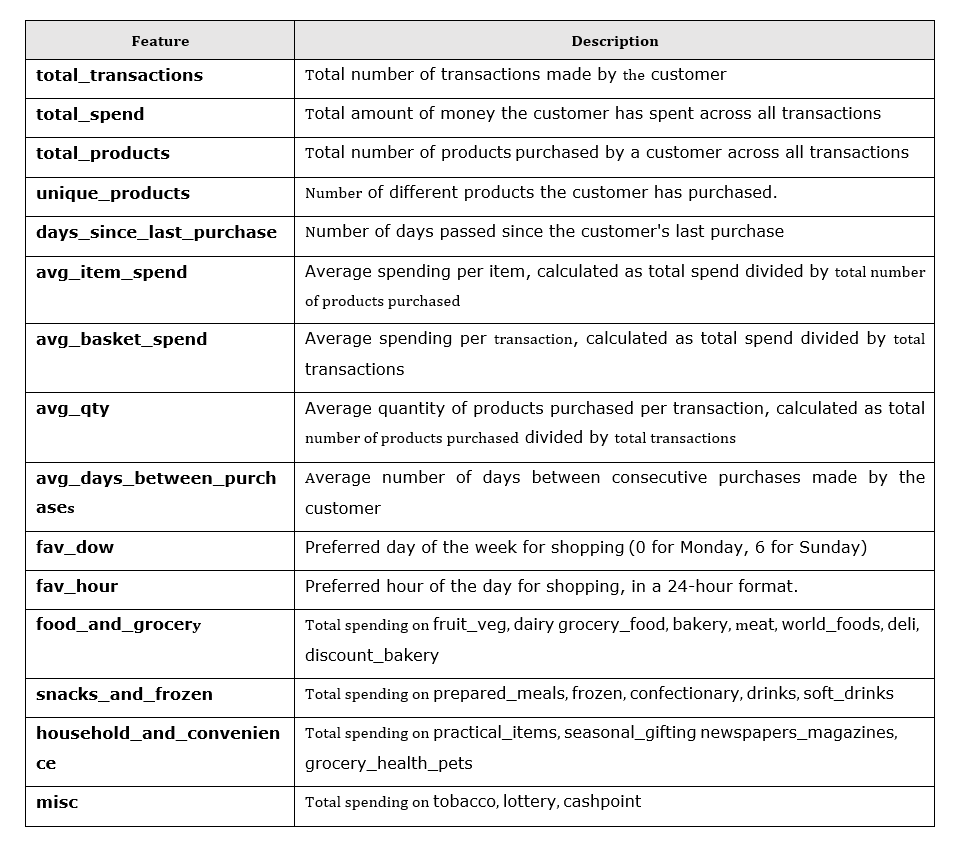

# 3. Feature Exploration

**General statistics of the features**

In [ ]:
df.describe()

,customer_number,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,8094.512179,65.246580,771.825399,584.593927,276.117784,7.974975,1.396747,14.776641,11.247790,4.071329,2.789456,13.014014,283.275025,219.147461,87.483090,153.900447
std,4684.519263,47.444982,554.059463,405.078609,184.199792,20.437252,0.568403,11.064767,8.484392,4.205451,1.793601,3.125513,225.229058,194.146053,86.061834,269.453805
min,14.000000,2.000000,7.280000,6.000000,6.000000,0.000000,0.558163,1.456000,1.200000,0.048257,0.000000,7.000000,1.830000,0.000000,0.000000,0.000000
25%,4045.000000,32.000000,407.030000,308.000000,150.000000,0.000000,1.072834,8.041667,6.120690,1.607143,1.000000,10.000000,133.720000,92.130000,31.880000,0.000000
50%,8217.000000,53.000000,627.750000,495.000000,233.000000,2.000000,1.252188,11.786627,8.731707,2.886792,3.000000,12.000000,235.610000,163.780000,63.710000,30.850000
75%,12110.000000,86.000000,960.930000,745.000000,359.000000,6.000000,1.534256,17.434118,13.375000,5.032258,4.000000,15.000000,367.160000,283.570000,112.020000,187.470000
max,16316.000000,374.000000,6588.650000,4949.000000,1650.000000,163.000000,7.919243,152.621667,90.750000,56.500000,6.000000,22.000000,3738.490000,1844.750000,905.200000,2621.940000


* Customers engage in approximately 65 purchases, the maximum being 374 and minimum being 2.
* They allocate £772 across all transactions on average, translating to an average transaction value of £14.77.
* The average customer purchased a total of 584 items and 276 unique products on average.
* Customers engage in an average of one transaction every 4 days. The mode of 0 days since the last purchase indicates that a significant portion of the customer base are very active.

**Distribution of favorite shopping day**

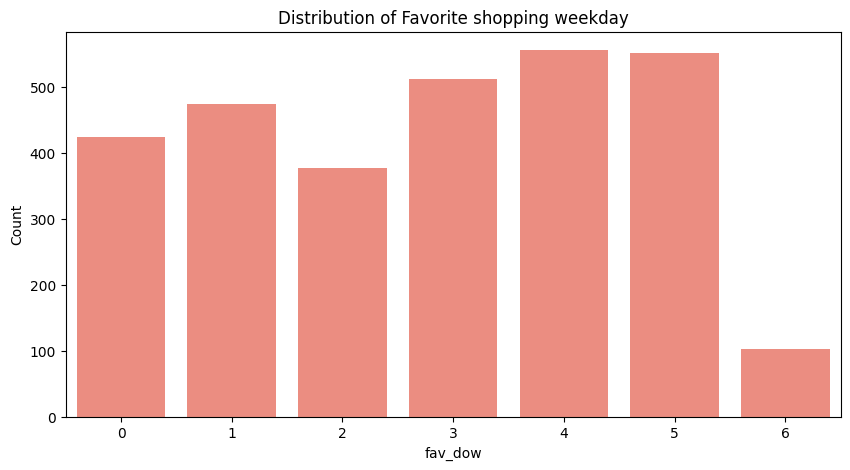

In [ ]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
sns.set_palette(colors)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='fav_dow')
plt.title('Distribution of Favorite shopping weekday')
plt.ylabel('Count')
plt.show()

Wednesday and Thursday are the most popular days for shopping, while Saturday and Friday show lower activity.

**Distribution of favorite shopping hour**

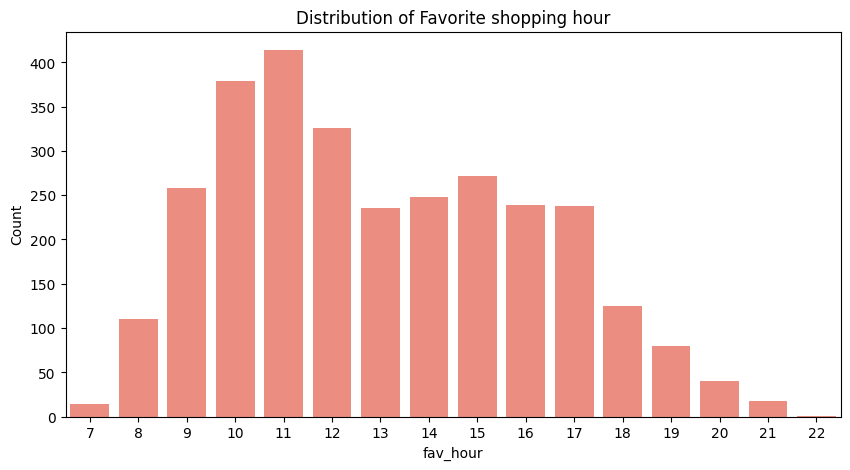

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='fav_hour')
plt.title('Distribution of Favorite shopping hour')
plt.ylabel('Count')
plt.show()

Peak shopping hours are between 10 am and 12 pm.

**Revenue by Category**

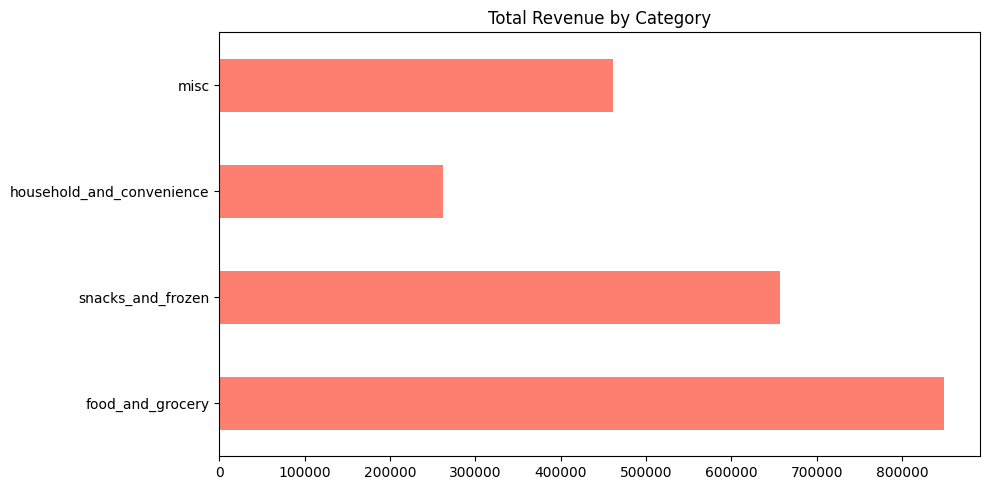

In [ ]:
# Calculate the sum of the specified columns
category_sums = df[['food_and_grocery', 'snacks_and_frozen', 'household_and_convenience', 'misc']].sum()

# Draw plot
plt.figure(figsize=(10, 5))
category_sums.plot(kind='barh')
plt.title('Total Revenue by Category')
plt.tight_layout()
plt.show()

Food and grocery emerge as the top revenue-generating category.

# 4. Data cleaning


First, reset the index to 'customer_number' to avoid including it in subsequent analysis.

In [ ]:
df.set_index('customer_number', inplace=True)

## 4.1. Removing outliers

Text(0.5, 0, 'Boxplots of features')

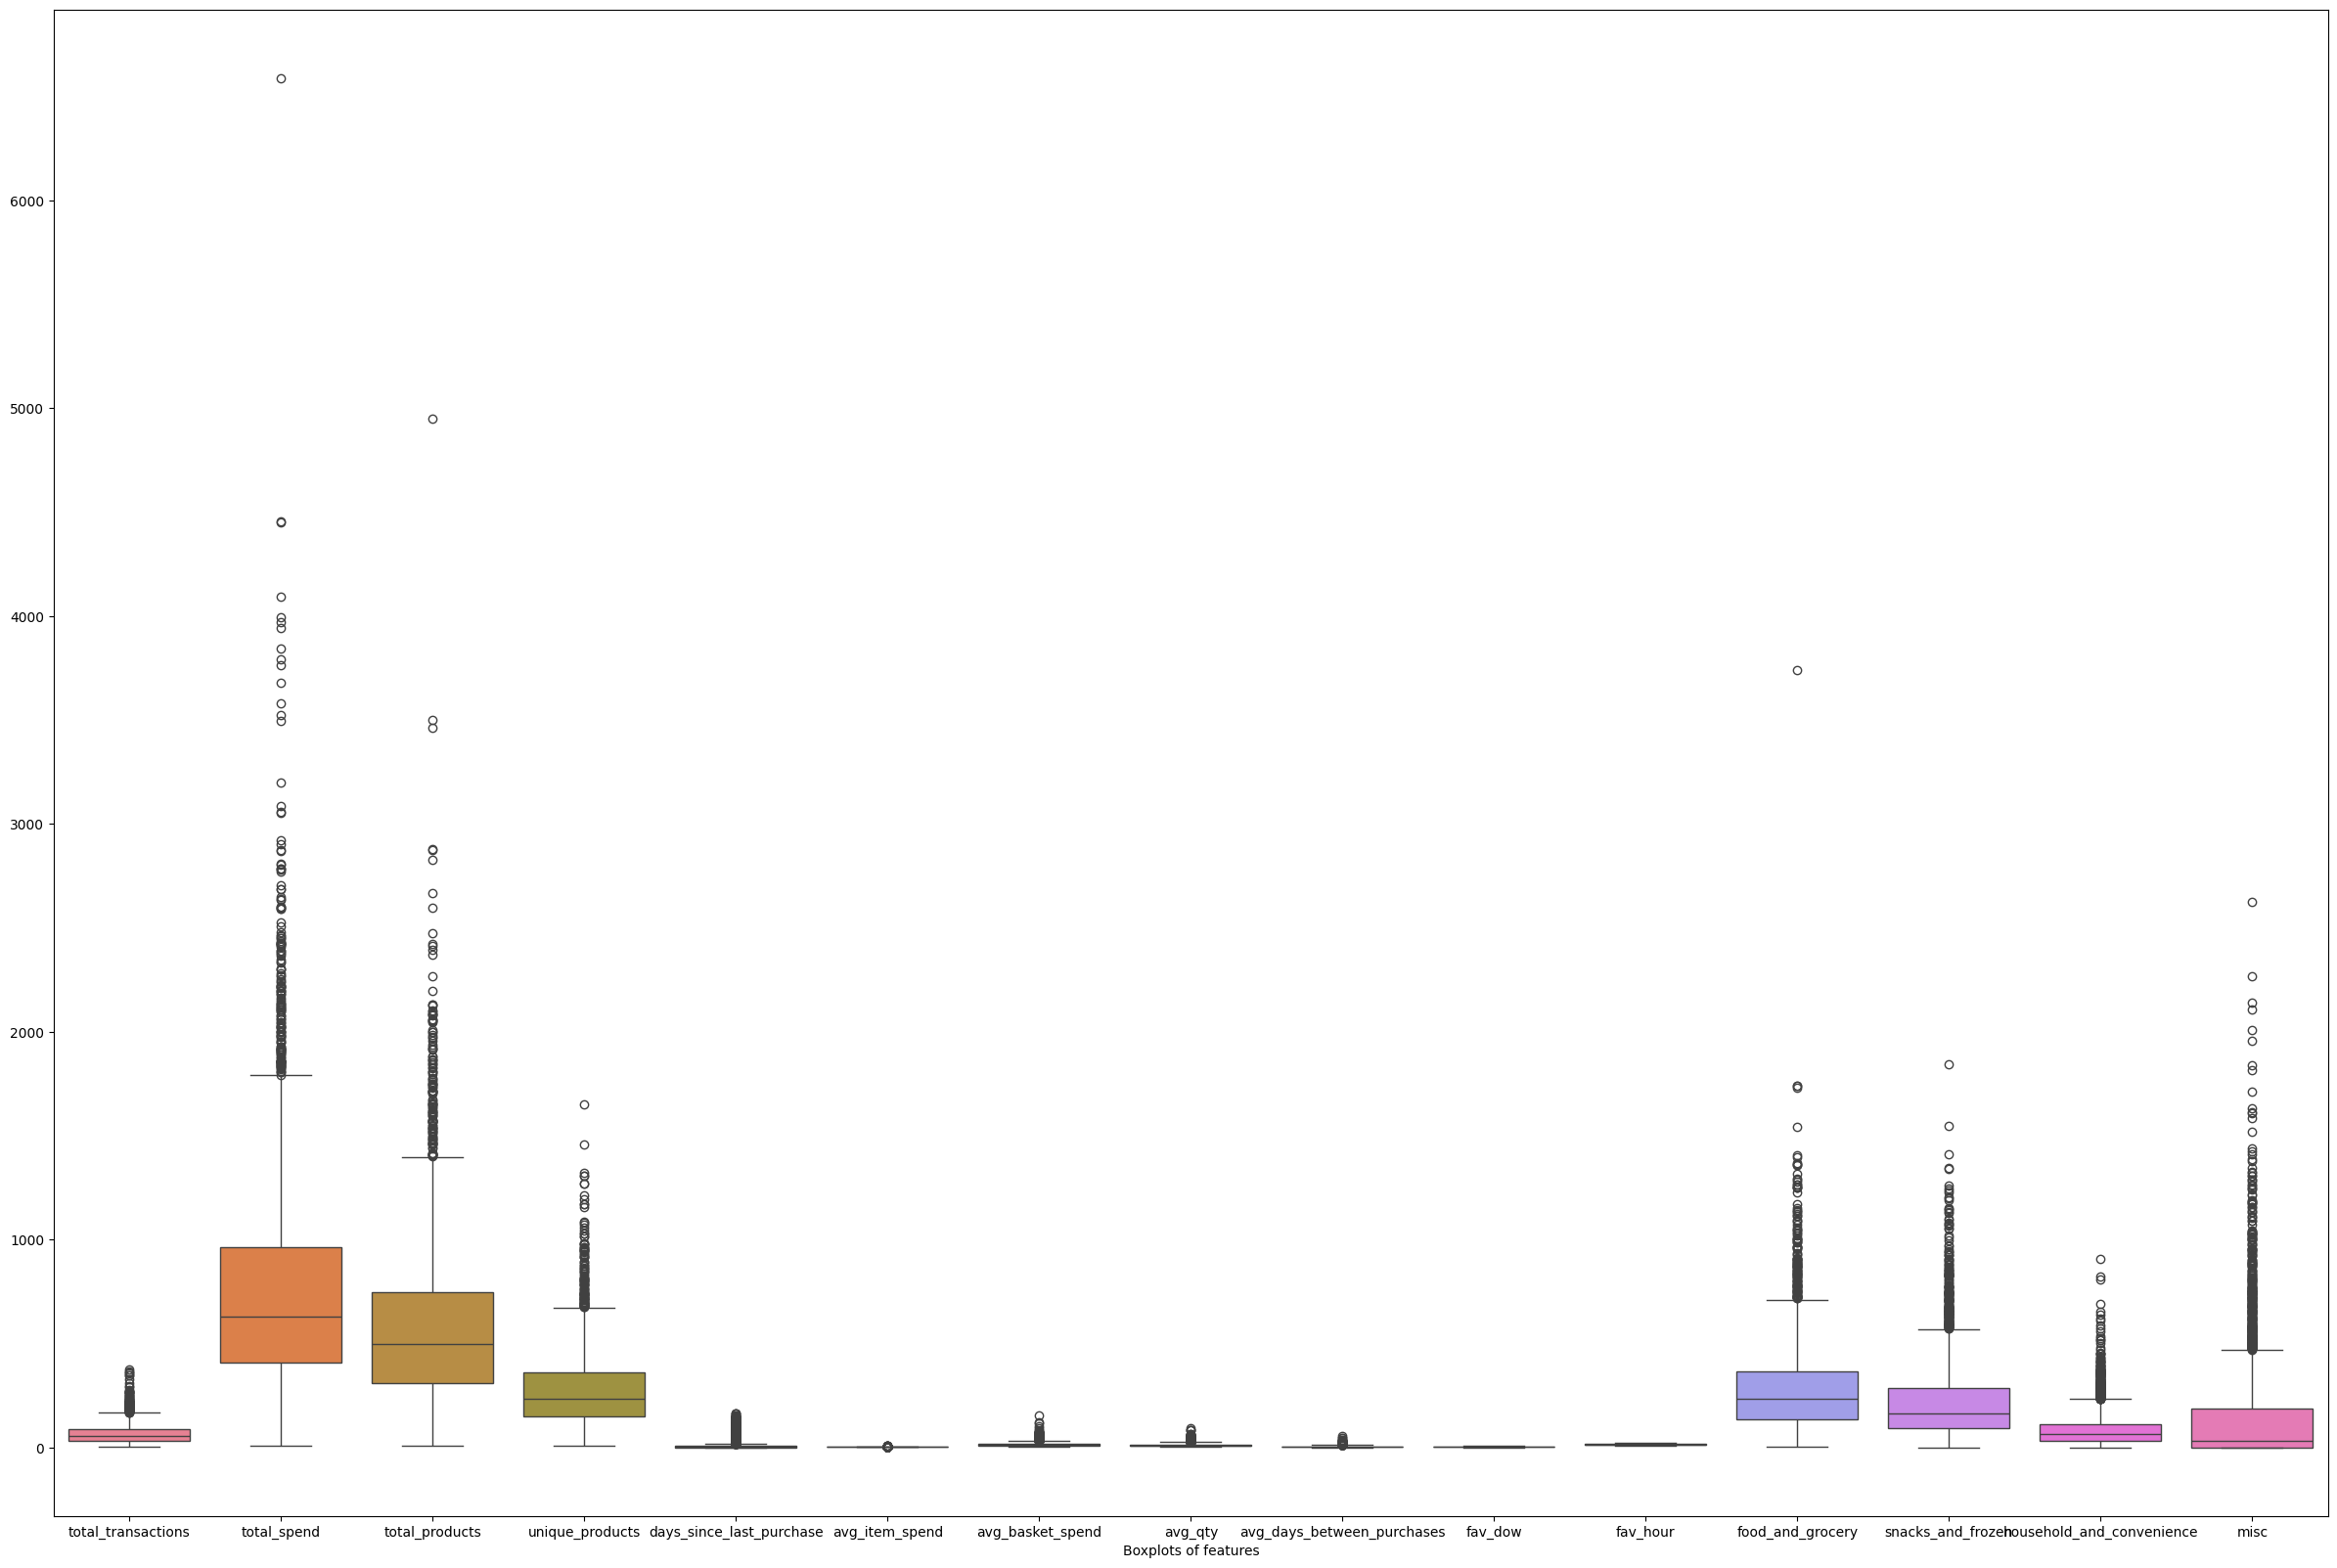

In [ ]:
fig, ax= plt.subplots(figsize=(30, 20))
boxplots= sns.boxplot(data = df)
plt.xlabel('Boxplots of features')

The box plots indicate the presence of outliers across multiple features. We will utilize the z-score method to identify and remove outliers from the dataset.

In [ ]:
# Check the number of datapoints before removing outliers
df.shape

(2997, 15)

In [ ]:
# Compute Z-scores for each feature
z_scores = df.apply(zscore)

# Define the cut off level for Z-score - We take a higher cut off level than usual to retain information, at the cost of retention of a certain number of outliers
threshold = 4

# Filter out outliers
outliers = (z_scores.abs() > threshold).any(axis=1)
df_cleaned = df[~outliers]

In [ ]:
# Check the number of datapoints after removing outliers
df_cleaned.shape

(2758, 15)

## 4.2. Scaling data

First, we generate histograms to get a sense of features' distribution.

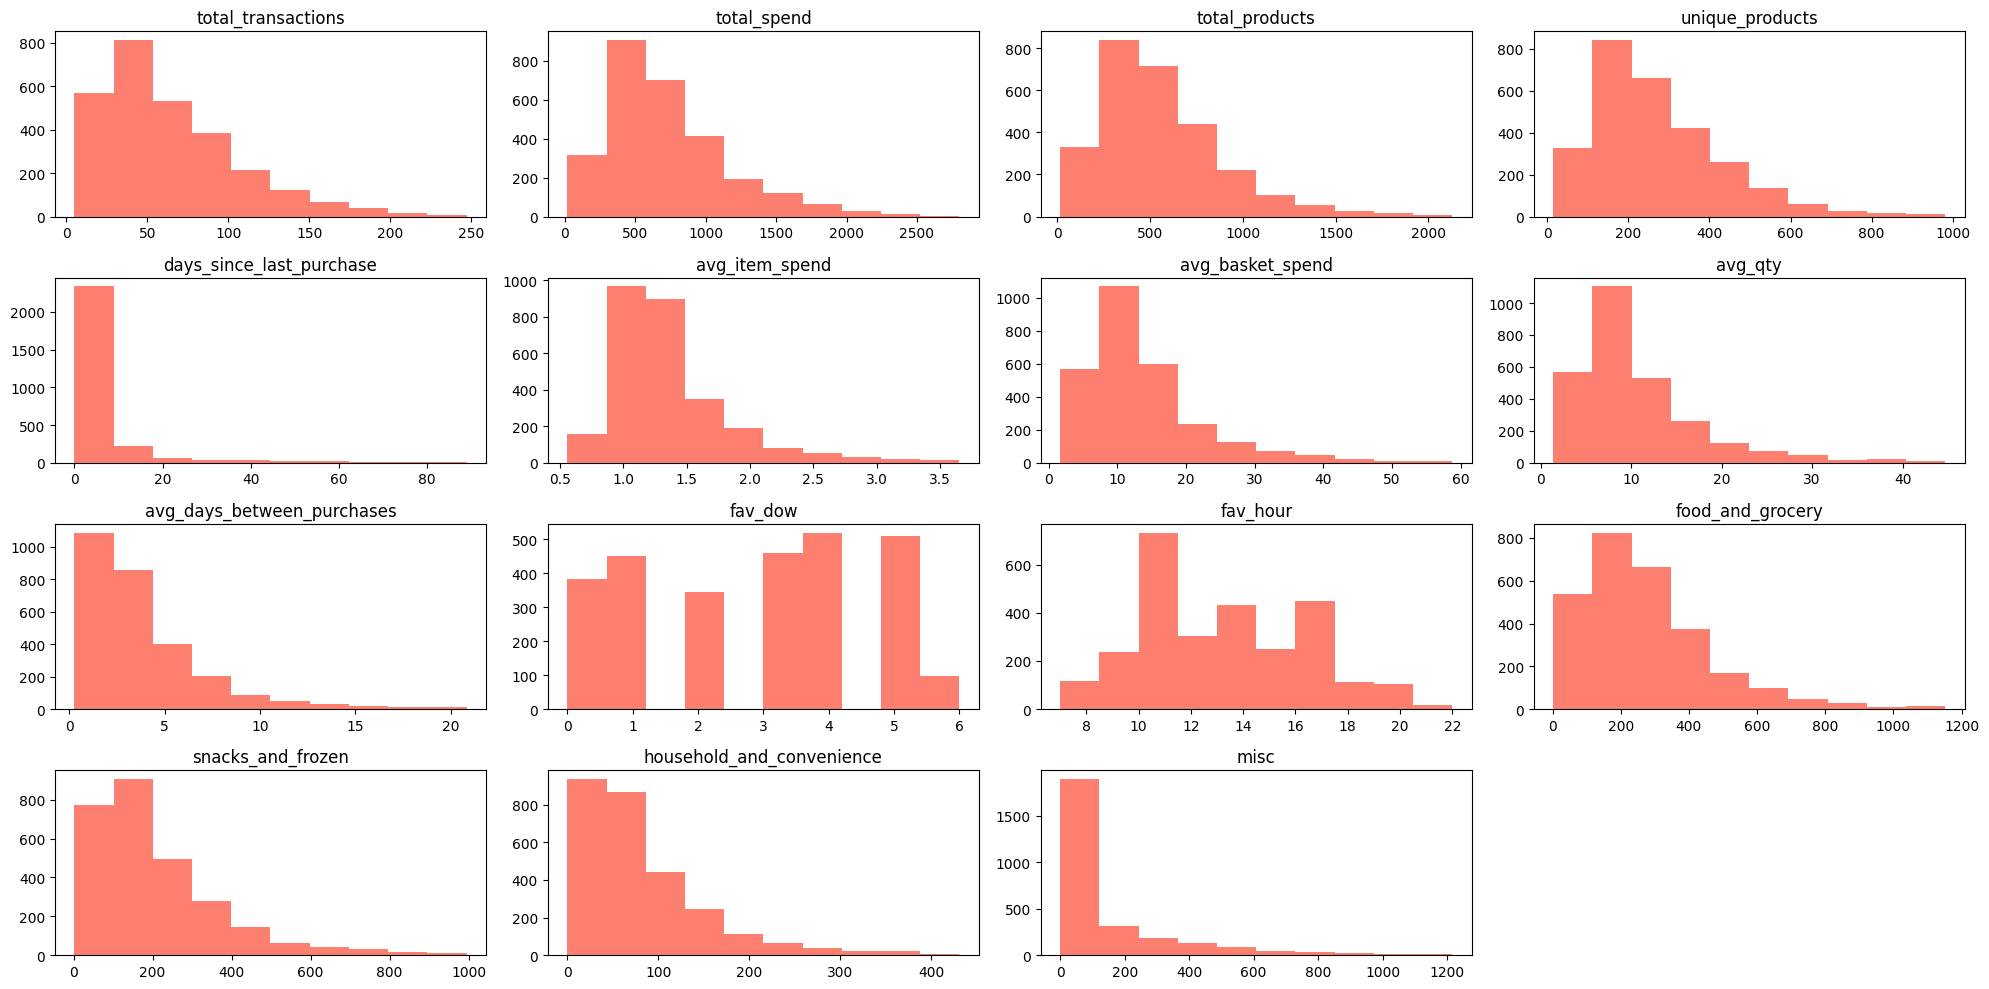

In [ ]:
df_cleaned.hist(figsize=(20,10), grid=False)
plt.tight_layout()
plt.show()

Many of the histograms show left-skewed distributions. We can consider applying a logarithmic transform to make the data appear more "normal." However, since many data points have a value of 0, we cannot applying a logarithm transformation directly. Adding 1 to each data point with a value of 0 can resolve this issue, but it may significantly alter the information, especially for features like days_since_last_purchase where 0 has a specific meaning. To maintain accuracy, we'll keep the data as is, potentially sacrificing KMeans clustering performance.

In [ ]:
df.describe()

,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,65.246580,771.825399,584.593927,276.117784,7.974975,1.396747,14.776641,11.247790,4.071329,2.789456,13.014014,283.275025,219.147461,87.483090,153.900447
std,47.444982,554.059463,405.078609,184.199792,20.437252,0.568403,11.064767,8.484392,4.205451,1.793601,3.125513,225.229058,194.146053,86.061834,269.453805
min,2.000000,7.280000,6.000000,6.000000,0.000000,0.558163,1.456000,1.200000,0.048257,0.000000,7.000000,1.830000,0.000000,0.000000,0.000000
25%,32.000000,407.030000,308.000000,150.000000,0.000000,1.072834,8.041667,6.120690,1.607143,1.000000,10.000000,133.720000,92.130000,31.880000,0.000000
50%,53.000000,627.750000,495.000000,233.000000,2.000000,1.252188,11.786627,8.731707,2.886792,3.000000,12.000000,235.610000,163.780000,63.710000,30.850000
75%,86.000000,960.930000,745.000000,359.000000,6.000000,1.534256,17.434118,13.375000,5.032258,4.000000,15.000000,367.160000,283.570000,112.020000,187.470000
max,374.000000,6588.650000,4949.000000,1650.000000,163.000000,7.919243,152.621667,90.750000,56.500000,6.000000,22.000000,3738.490000,1844.750000,905.200000,2621.940000


To ensure a balanced influence on the model and to reveal the true patterns in the data, we will standardize our data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Copy the cleaned dataset
df_scaled = df_cleaned.copy()

# Applying the scaler to all columns in the dataset
df_scaled[df_cleaned.columns] = scaler.fit_transform(df_scaled[df_cleaned.columns])

# Display the first few rows of the scaled data
df_scaled.head()

,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc
customer_number,,,,,,,,,,,,,,,
14,-0.195314,-0.112047,-0.088868,-0.124990,-0.384271,-0.190298,-0.194690,-0.168140,-0.322478,1.229031,0.960358,0.938550,-0.100752,-0.846285,-0.627342
45,-0.754761,-0.321753,0.285674,-0.374886,-0.384271,-1.006275,0.471032,1.368664,0.444954,0.114742,-0.000581,0.295000,-0.043939,-0.574162,-0.627342
52,-0.122342,-1.168942,-0.804728,-0.611967,-0.299991,-1.305079,-1.167058,-0.835128,-0.394938,0.114742,-0.320894,-0.646369,-1.183439,-0.622301,-0.575854
61,-0.657466,-0.409979,-0.185524,-0.297995,-0.215711,-0.566919,0.126385,0.425501,0.183616,-1.556692,0.960358,0.366457,-0.586466,-0.354606,-0.599258
63,-0.389904,-1.003116,-0.843994,-0.599152,0.121408,-0.683441,-0.892300,-0.705986,-0.180065,-0.442403,-0.320894,-0.789228,-0.648823,-0.784433,-0.613300


## 4.3. Dimensonality Reduction

Check for data correlations

Text(0.5, 80.5815972222222, 'Product category variables correlations')

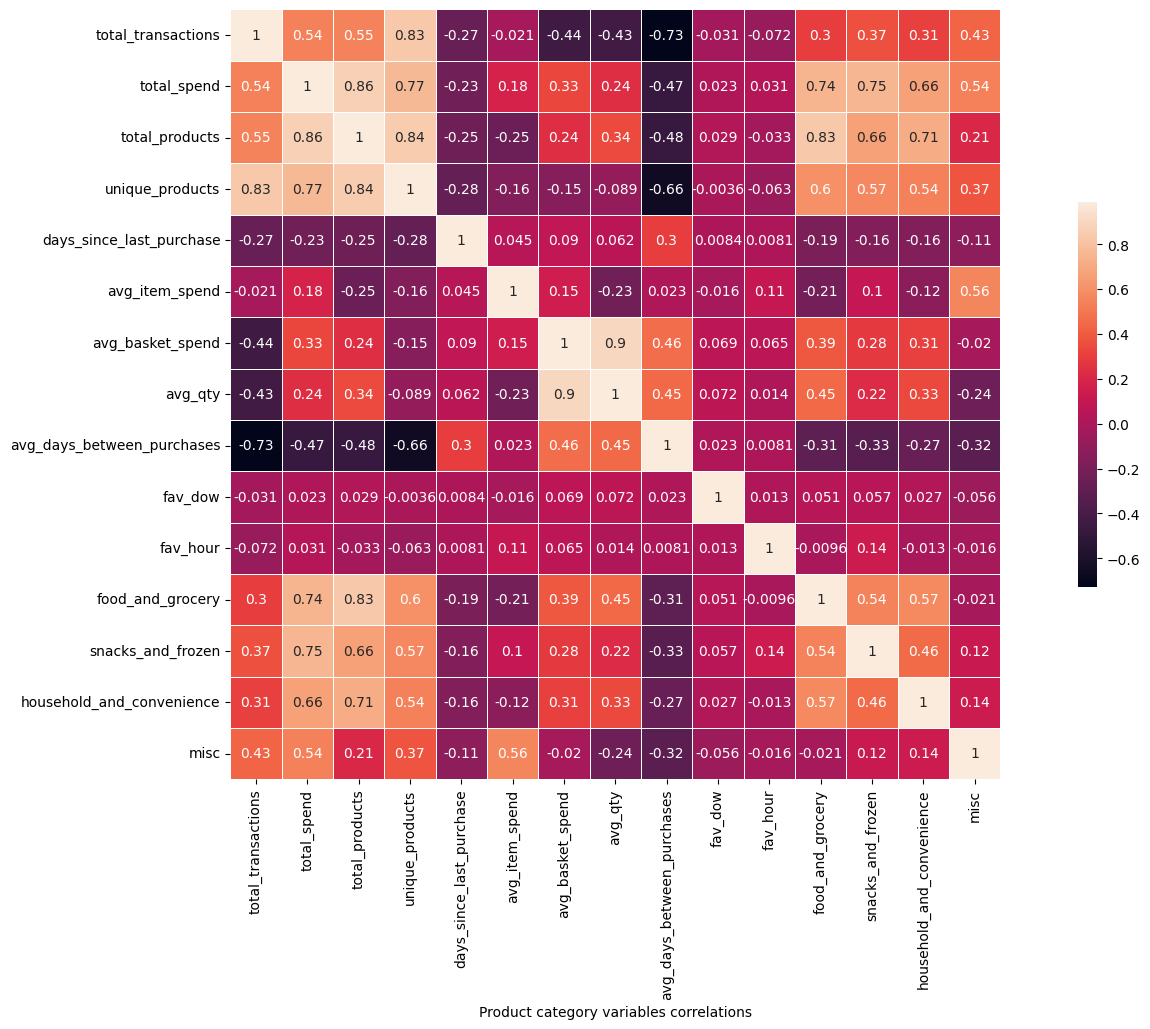

In [ ]:
# Create a cross correlation of all the variables against each other
corr = df_scaled.corr()

# Set up the matplotlib figure
fig, ax= plt.subplots(figsize=(20, 10))

# Generate heatmap
sns.heatmap(corr, vmax=.99, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.xlabel('Product category variables correlations')

There is a high number of features, many of which are highly correlated (For example: avg_days_between_purchases and total_transactions, unique_products and total_spend, etc.), and hence redundant. We will perform dimensionality reduction on the selected features before putting them through a classifier using Principal Component Analysis (PCA). We will create a plot to visualise the explained variance ratio and cumulative explained variance for each component. This plot aids in determining an appropriate number of dimensions, balancing the preservation of information with the reduction of dimensionality

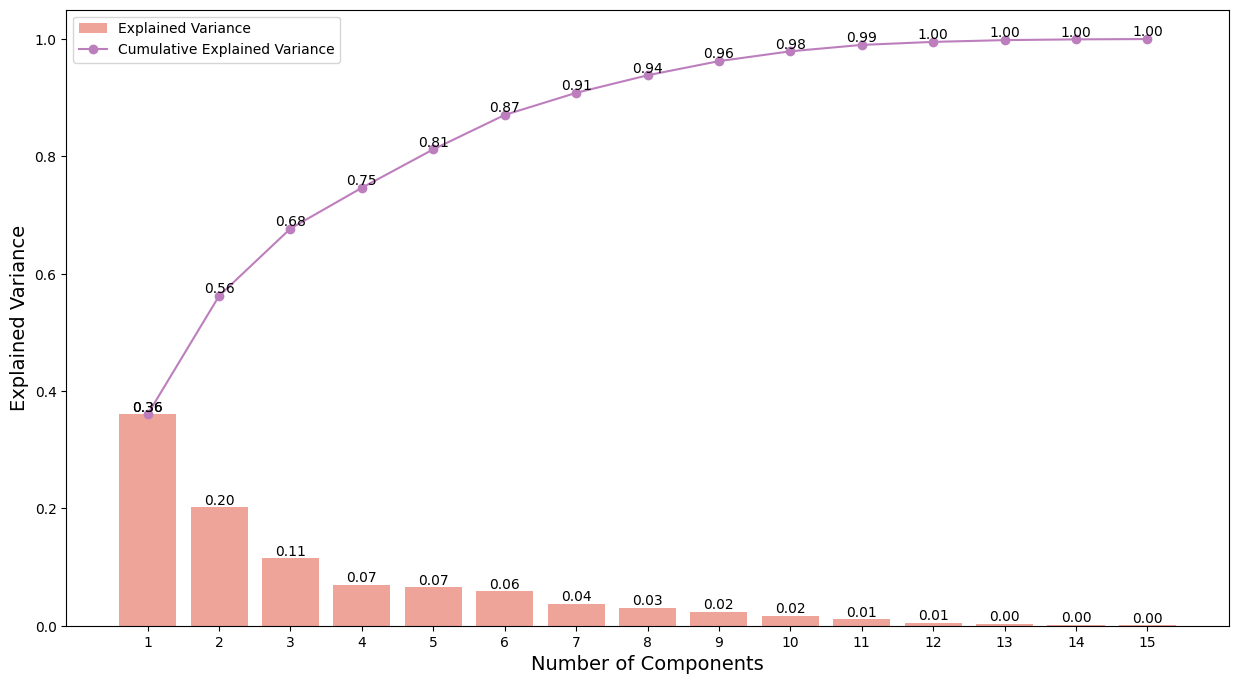

In [ ]:
# Apply PCA
pca = PCA().fit(df_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(15,8))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=range(1, len(cumulative_explained_variance) + 1), y=explained_variance_ratio, color='#fd7f6f', alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', color='#bd7ebe')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)

# Add legend
plt.legend(handles=[barplot.patches[0], lineplot], labels=['Explained Variance', 'Cumulative Explained Variance'])

# Display the variance values for both graphs on the plots
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    plt.text(i, cum_ev_ratio, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(False)
plt.show()

The first 6 components are retained as they explain a substantial 87% of the variance in the dataset. There will be sufficient information to effectively identify distinct customer groups while the dimensionality of the dataset is reduced.

In [ ]:
# Apply PCA with 6 dimensions
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

# Creating a new dataframe with columns labeled as the components
df_pca = pd.DataFrame(df_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the index back to the new PCA dataframe
df_pca.index = df_scaled.index

In [ ]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
customer_number,,,,,,
14,-0.135415,0.061556,-0.545791,1.609612,0.571455,-0.359311
45,-0.501974,1.630458,-0.984220,0.087413,-0.095695,-0.569067
52,-1.888588,-1.397700,-1.722888,0.012985,0.144689,-0.334895
61,-0.811365,0.635983,-0.591036,0.139381,-1.910471,-0.220579
63,-1.961623,-1.059226,-1.024082,-0.181257,-0.309978,0.040750


# 5. Customer Segmentation

## 5.1. Determine the number of clusters

To determine the optimal number of clusters, the following two methods are used:


*   The Elbow Method: Plot the inertia/WCSS score (the sum of squared distances between each data point and its assigned cluster centroid) against the number of clusters (k). The "elbow" point indicates the optimal k where the reduction in inertia achieved by increasing k becomes marginal.
*  The Silhouette Method: Calculate the silhouette coefficient for each data point across various k values. Choose the k with the highest average silhouette score as the optimal number of clusters.

In [ ]:
# Create lists to store the WCSS and silhouette scores
wcss = []
silhouette = []

# Range of k values to test
KS = list(range(2,11))

# Iterate over each value of k
for k in KS:
  # Train a KMeans model on the scaled training set
  model = KMeans(n_clusters = k).fit(df_pca)
  # Calculate WCSS score
  wcss.append(model.inertia_/len(df_pca))
  # Calculate silhouette score
  cluster_labels = model.predict(df_pca)
  silhouette.append(silhouette_score(df_pca, cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Visualise WCSS and Silhouette score

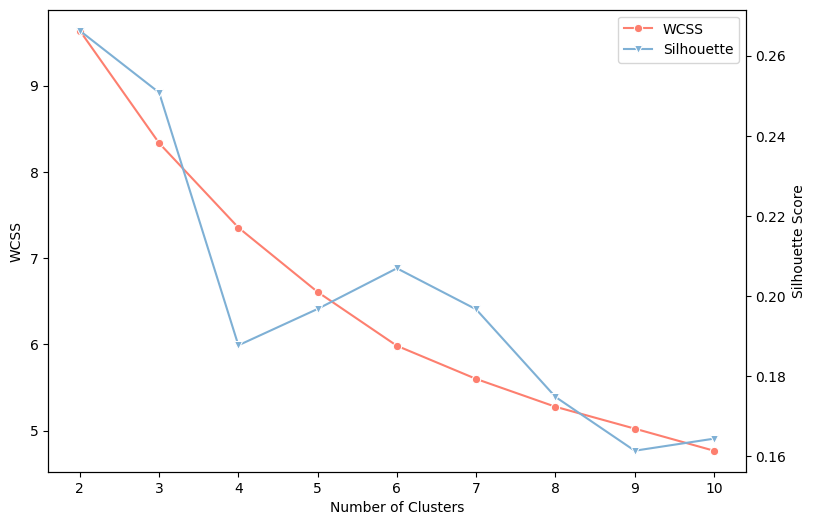

In [ ]:
plt.figure(figsize=(9,6))

# Plot WCSS
ax1 = sns.lineplot(x=KS, y=wcss, color='#fd7f6f', marker='o', label='WCSS', legend=None)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS')

# Create a twin axis for silhouette score
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score')

# Plot silhouette score
sns.lineplot(x=KS, y=silhouette, ax=ax2, color='#7eb0d5', marker='v', label='Silhouette', legend=None)

# Hide grid lines on both axes
ax1.grid(False)
ax2.grid(False)

# Combine legends from both axes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=0)

plt.show()

While the “elbow” point is not too distinct in the line plot for WCSS, it is still possible to see the drop in WCSS becoming more minimal after 6. Additionally, a small peak in the average silhouette score line is observed at k = 6, suggesting its potential as an optimal value. Despite k = 6 not having the highest average silhouette score compared to k = 2 or k = 3, it offers a more granular cluster separation, enabling the company to personalize and target their strategy effectively.

## 5.2. Applying clustering model

In [ ]:
# Fit KMeans with 6 clusters to the PCA-transformed data
model = KMeans(n_clusters=6, random_state=42).fit(df_pca)

# Predict cluster labels for each data point
cluster_labels = model.predict(df_pca)

# Assign cluster labels to the DataFrame containing PCA-transformed data
df_pca['cluster'] = cluster_labels
df_pca.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,PC1,PC2,PC3,PC4,PC5,PC6,cluster
customer_number,,,,,,,
14,-0.135415,0.061556,-0.545791,1.609612,0.571455,-0.359311,3
45,-0.501974,1.630458,-0.984220,0.087413,-0.095695,-0.569067,1
52,-1.888588,-1.397700,-1.722888,0.012985,0.144689,-0.334895,1
61,-0.811365,0.635983,-0.591036,0.139381,-1.910471,-0.220579,1
63,-1.961623,-1.059226,-1.024082,-0.181257,-0.309978,0.040750,1


In [ ]:
# Assign cluster labels to the original cleaned DataFrame
df_cleaned['cluster'] = cluster_labels
df_cleaned.head()

<ipython-input-74-dd219cabfd6d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc,cluster
customer_number,,,,,,,,,,,,,,,,
14,56,675.72,531,250,1,1.272542,12.066429,9.482143,2.781818,5,16,444.25,190.63,22.75,0.0,3
45,33,585.73,655,211,1,0.894244,17.749394,19.848485,5.218750,3,13,326.18,199.75,41.80,0.0,1
52,59,222.18,294,174,2,0.755714,3.765763,4.983051,2.551724,3,12,153.47,16.83,38.43,11.0,1
61,37,547.87,499,223,3,1.097936,14.807297,13.486486,4.388889,0,16,339.29,112.66,57.17,6.0,1
63,48,293.34,281,176,7,1.043915,6.111250,5.854167,3.234043,2,12,127.26,102.65,27.08,3.0,1


## 5.3. Cluster visualisation

**3D Visualisation:** A 3D visualisation is created with the top 3 PCs, which capture the most variance in the data.

In [ ]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#f46a9b"]

# Group data points by cluster
clusters = [df_pca[df_pca['cluster'] == i] for i in range(6)]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
for i, cluster in enumerate(clusters):
    fig.add_trace(go.Scatter3d(x=cluster['PC1'], y=cluster['PC2'], z=cluster['PC3'],
                               mode='markers', marker=dict(color=colors[i], size=5, opacity=0.4), name=f'Cluster {i}'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),),
    width=900,
    height=800)

# Show the plot
fig.show()

Visual examination of the clusters reveals distinct spatial groupings of data points, suggesting clear boundaries between clusters. This separation is indicative of the effectiveness of the clustering algorithm in partitioning the dataset into homogeneous groups.

**Cluster Distribution**: To check if clusters are balanced

<ipython-input-90-488c677dddd0>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




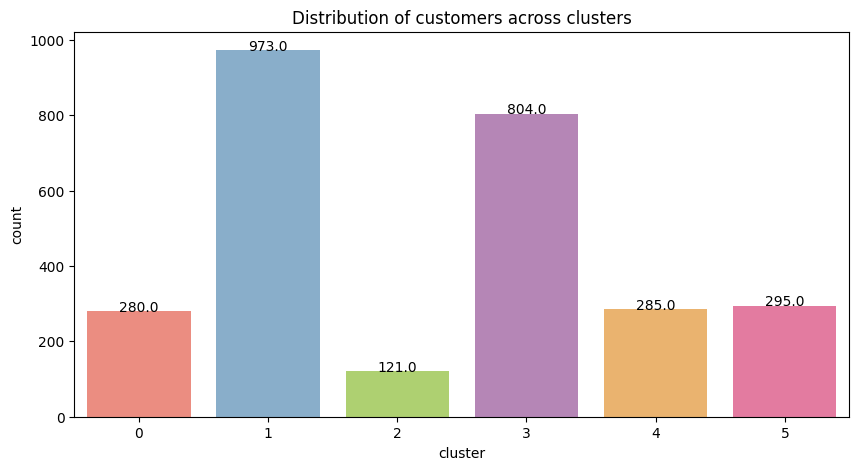

In [ ]:
plt.figure(figsize=(10,5))
pl = sns.countplot(x=df_pca["cluster"], palette=colors)

# Add number labels to each bar
for p in pl.patches:
    height = p.get_height()
    pl.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")

plt.title("Distribution of customers across clusters")
plt.show()

In [ ]:
df_pca.shape

(2758, 7)

The clusters exhibit a fairly even distribution of customers, with each cluster containing a significant proportion of the dataset. This indicates the relevance of each cluster in representing distinct segments, without being dominated by outliers or noise. Overall, the clustering solution appears robust and meaningful.

# 6. Creating profiles

**Generate cluster's centroid values**

In [ ]:
df_cleaned.groupby('cluster').mean()

,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc
cluster,,,,,,,,,,,,,,,
0,30.871429,915.702214,731.367857,217.350000,5.525000,1.278695,31.436006,25.022651,6.454556,3.189286,13.050000,428.483464,278.333571,127.523179,38.426071
1,37.599178,397.328715,323.412127,156.388489,4.700925,1.271709,11.792218,9.510674,5.303967,2.696814,13.229188,168.021418,119.194532,46.812795,44.199065
2,27.801653,326.751983,238.892562,115.892562,51.603306,1.479666,14.661790,10.535884,7.872870,2.834711,12.727273,120.234959,100.984298,38.049835,53.384215
3,90.633085,743.606169,661.478856,354.042289,1.925373,1.142663,9.253908,8.170929,1.815325,2.856965,12.594527,307.690684,216.691493,87.107736,94.938731
4,114.308772,1593.857193,1208.196491,557.056140,1.863158,1.368428,15.945548,12.058548,1.349095,2.736842,13.136842,559.089018,466.833719,188.438035,329.121965
5,76.457627,886.791424,410.538983,246.918644,3.013559,2.270665,12.977397,5.893609,2.480690,2.606780,13.298305,154.581220,193.109797,56.071186,472.178271


**Assess cluster's revenue contribution**

In [ ]:
df_cleaned.groupby('cluster')['total_spend'].sum()

cluster
0    256396.62
1    386600.84
2     39536.99
3    597859.36
4    454249.30
5    261603.47
Name: total_spend, dtype: float64

**Generate modes for fav_dow and fav_hour**

In [ ]:
df_cleaned.groupby('cluster')[['fav_dow', 'fav_hour']].agg(lambda x: x.mode().iloc[0])

,fav_dow,fav_hour
cluster,,
0,4,11
1,5,11
2,3,11
3,5,11
4,4,10
5,4,11


There seems to be no apparent difference between clusters in terms of favorite shopping day and favorite shopping hour.

**Create radar charts to visualise the centroid values of each cluster across different features and gain a visual comparison of cluster profiles**

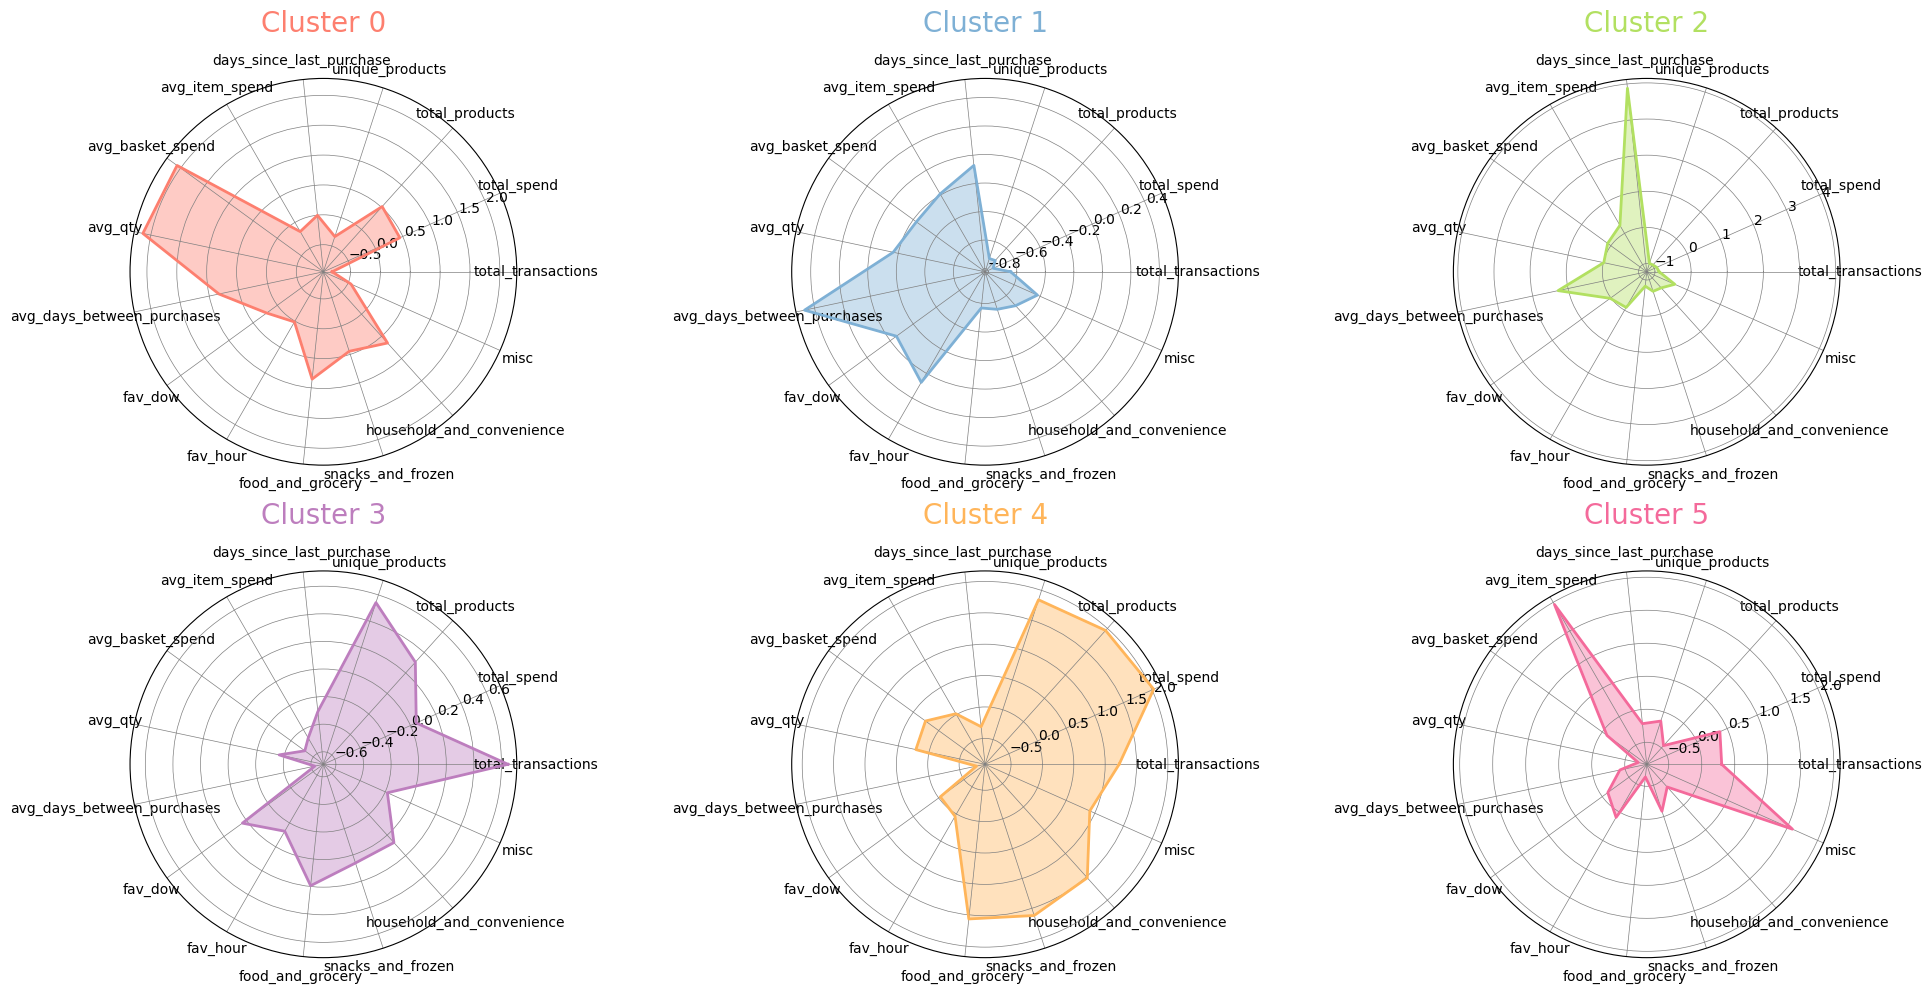

In [ ]:
# Add cluster labels to the scaled DataFrame
df_scaled['cluster'] = cluster_labels

# Calculate the centroids of each cluster
cluster_centroids = df_scaled.groupby('cluster').mean()

# Function to create radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2)
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1])
    ax.grid(color='grey', linewidth=0.5)

# Set data and angles
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure and create radar chart for each cluster
fig, ax = plt.subplots(figsize=(20, 10), nrows=2, ncols=3, subplot_kw=dict(polar=True))
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].values.tolist() + [cluster_centroids.loc[i].values[0]]
    create_radar_chart(ax.flat[i], angles, data, color, i)

# Display the plot
plt.tight_layout()
plt.show()

**Generate** **summary statistics for each cluster**

In [ ]:
for c, d in df_cleaned.groupby('cluster'):
    print("Cluster", c)
    display(d.describe())

Cluster 0


,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc,cluster
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.0
mean,30.871429,915.702214,731.367857,217.350000,5.525000,1.278695,31.436006,25.022651,6.454556,3.189286,13.050000,428.483464,278.333571,127.523179,38.426071,0.0
std,11.629491,321.680565,259.513945,73.128543,7.280805,0.240955,8.978880,7.143564,3.347123,1.651509,2.775533,180.015198,134.807216,81.683241,94.706762,0.0
min,9.000000,304.300000,217.000000,59.000000,0.000000,0.748651,17.459574,12.069767,2.340000,0.000000,8.000000,119.490000,58.110000,3.120000,0.000000,0.0
25%,22.000000,680.200000,529.000000,162.000000,1.000000,1.112917,24.414592,19.669736,4.104588,2.000000,11.000000,298.787500,172.177500,71.650000,0.000000,0.0
50%,29.000000,874.680000,712.500000,214.500000,3.000000,1.254240,29.364596,23.296296,5.644253,4.000000,13.000000,405.930000,264.780000,107.560000,0.000000,0.0
75%,39.250000,1090.065000,878.000000,269.250000,7.000000,1.411852,37.768825,28.970066,7.507576,4.000000,15.000000,514.890000,366.432500,163.545000,21.000000,0.0
max,58.000000,2117.220000,1709.000000,394.000000,44.000000,2.298370,58.763636,44.714286,19.125000,6.000000,20.000000,1152.070000,753.300000,431.190000,675.610000,0.0


Cluster 1


,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc,cluster
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.0
mean,37.599178,397.328715,323.412127,156.388489,4.700925,1.271709,11.792218,9.510674,5.303967,2.696814,13.229188,168.021418,119.194532,46.812795,44.199065,1.0
std,15.460413,140.757516,120.896351,53.079984,5.738288,0.311433,5.136308,4.087643,2.883105,1.861335,3.066796,86.751375,71.500557,34.903401,68.460721,0.0
min,7.000000,18.360000,16.000000,14.000000,0.000000,0.558163,1.669091,1.454545,1.395833,0.000000,7.000000,2.190000,5.090000,0.600000,0.000000,1.0
25%,26.000000,297.120000,236.000000,119.000000,1.000000,1.069193,7.766735,6.395833,3.276596,1.000000,11.000000,102.240000,67.990000,22.360000,0.000000,1.0
50%,36.000000,392.120000,319.000000,156.000000,3.000000,1.215494,11.165897,8.680000,4.558824,3.000000,13.000000,155.790000,104.210000,38.070000,10.000000,1.0
75%,48.000000,498.160000,404.000000,195.000000,7.000000,1.419543,14.978286,12.311111,6.384615,4.000000,16.000000,222.530000,155.550000,63.420000,62.180000,1.0
max,100.000000,770.970000,740.000000,316.000000,32.000000,3.156667,37.732000,26.000000,20.125000,6.000000,22.000000,537.510000,476.350000,234.030000,387.810000,1.0


Cluster 2


,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc,cluster
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0
mean,27.801653,326.751983,238.892562,115.892562,51.603306,1.479666,14.661790,10.535884,7.872870,2.834711,12.727273,120.234959,100.984298,38.049835,53.384215,2.0
std,23.850444,221.199289,169.701788,87.241122,18.150978,0.530437,7.985069,6.145104,5.576304,1.771756,3.188521,100.250126,89.812737,34.389521,87.393258,0.0
min,5.000000,39.680000,31.000000,16.000000,23.000000,0.788955,3.617564,2.410256,0.428571,0.000000,8.000000,3.710000,2.340000,0.000000,0.000000,2.0
25%,11.000000,170.560000,120.000000,53.000000,36.000000,1.162692,8.279231,5.732394,2.944444,2.000000,10.000000,54.220000,43.400000,13.520000,0.000000,2.0
50%,19.000000,253.930000,197.000000,87.000000,51.000000,1.307679,12.275000,8.965517,7.050000,3.000000,12.000000,88.780000,72.300000,27.890000,4.570000,2.0
75%,38.000000,420.560000,300.000000,156.000000,61.000000,1.674257,18.707692,13.636364,11.666667,4.000000,15.000000,143.100000,131.800000,59.370000,61.140000,2.0
max,120.000000,1035.650000,723.000000,399.000000,89.000000,3.647347,37.369524,31.272727,20.833333,6.000000,20.000000,471.790000,555.160000,228.100000,353.520000,2.0


Cluster 3


,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc,cluster
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.0
mean,90.633085,743.606169,661.478856,354.042289,1.925373,1.142663,9.253908,8.170929,1.815325,2.856965,12.594527,307.690684,216.691493,87.107736,94.938731,3.0
std,35.450292,195.335996,163.963337,93.219198,3.775045,0.240904,3.843899,3.181697,0.784127,1.775210,3.045487,118.447147,112.695464,50.062645,126.393792,0.0
min,41.000000,294.380000,309.000000,113.000000,0.000000,0.589959,2.070718,1.694064,0.273109,0.000000,7.000000,41.150000,17.280000,2.720000,0.000000,3.0
25%,64.000000,601.517500,541.000000,281.000000,0.000000,0.964872,6.300980,5.802183,1.241767,1.000000,10.000000,222.747500,141.127500,50.477500,1.000000,3.0
50%,82.000000,735.795000,640.000000,339.500000,1.000000,1.116022,8.570872,7.634056,1.731238,3.000000,12.000000,300.845000,196.305000,77.810000,36.725000,3.0
75%,107.000000,885.795000,758.500000,413.000000,2.000000,1.295279,11.644720,9.934568,2.379329,4.000000,15.000000,381.057500,277.790000,113.902500,145.340000,3.0
max,239.000000,1329.290000,1204.000000,688.000000,46.000000,2.022164,20.127091,18.413043,4.200000,6.000000,21.000000,704.010000,849.030000,357.420000,619.250000,3.0


Cluster 4


,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc,cluster
count,285.000000,285.000000,285.000000,285.00000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.0
mean,114.308772,1593.857193,1208.196491,557.05614,1.863158,1.368428,15.945548,12.058548,1.349095,2.736842,13.136842,559.089018,466.833719,188.438035,329.121965,4.0
std,41.059079,349.243349,303.103414,149.06201,5.052423,0.336712,7.416741,5.689952,0.667692,1.773497,3.407564,211.476068,195.239814,89.864700,320.827473,0.0
min,48.000000,980.710000,649.000000,240.00000,0.000000,0.755026,5.141943,3.719780,0.294606,0.000000,7.000000,121.720000,105.770000,27.190000,0.000000,4.0
25%,82.000000,1332.880000,969.000000,443.00000,0.000000,1.123589,10.659630,8.247788,0.846154,1.000000,10.000000,392.020000,311.730000,116.260000,26.000000,4.0
50%,109.000000,1510.160000,1164.000000,534.00000,0.000000,1.327554,14.168600,10.500000,1.201754,3.000000,13.000000,534.330000,423.480000,174.500000,233.690000,4.0
75%,140.000000,1808.710000,1378.000000,655.00000,2.000000,1.537790,19.539881,14.820513,1.727273,4.000000,16.000000,687.400000,578.670000,253.250000,575.340000,4.0
max,247.000000,2801.320000,2129.000000,982.00000,56.000000,2.632925,58.021458,37.729167,3.425532,6.000000,21.000000,1140.740000,972.720000,421.340000,1216.600000,4.0


Cluster 5


,total_transactions,total_spend,total_products,unique_products,days_since_last_purchase,avg_item_spend,avg_basket_spend,avg_qty,avg_days_between_purchases,fav_dow,fav_hour,food_and_grocery,snacks_and_frozen,household_and_convenience,misc,cluster
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.00000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0
mean,76.457627,886.791424,410.538983,246.918644,3.013559,2.270665,12.977397,5.893609,2.480690,2.60678,13.298305,154.581220,193.109797,56.071186,472.178271,5.0
std,34.693665,327.909883,168.936945,104.552725,5.711888,0.508265,5.375107,2.524559,1.520461,1.73831,3.400555,93.337294,178.607902,43.476160,253.171356,0.0
min,20.000000,258.530000,83.000000,60.000000,0.000000,1.428333,3.612949,1.370968,0.388889,0.00000,8.000000,1.830000,4.990000,0.000000,0.000000,5.0
25%,50.000000,655.815000,283.500000,167.000000,0.000000,1.875545,9.294905,4.171766,1.394577,1.00000,10.500000,76.015000,71.470000,21.730000,296.770000,5.0
50%,72.000000,834.380000,404.000000,237.000000,1.000000,2.151810,12.207048,5.311828,2.040000,3.00000,13.000000,140.120000,136.860000,47.990000,431.910000,5.0
75%,97.000000,1083.065000,527.000000,312.000000,3.000000,2.550907,15.551732,7.335678,3.206207,4.00000,16.000000,215.315000,259.245000,78.390000,593.035000,5.0
max,217.000000,1823.310000,873.000000,569.000000,44.000000,3.654796,38.176364,16.631579,9.105263,6.00000,21.000000,442.400000,994.480000,282.720000,1185.290000,5.0


The clusters are named and profiled for better interpretation.
* **Cluster 0:** **The Big Spenders**
Customers in this cluster exhibit high-value transactions, characterized by very high average basket spend of £31.4 and average quantity of 25 items. Despite fewer transactions, their substantial spending suggests a high disposable income, possibly demanding careers, and limited time for frequent shopping. They prioritise practicality and household need over discretionary purchases.
* **Cluster 1: The Practical Shoppers**.
These customers shop in a balanced manner, with moderately higher intervals between purchases of 5 days on average. Despite shopping across all categories, their total spends, total products purchased, and total number of transactions made remain on the lower side. They tend to spend wisely on items, evidenced by their relatively low average spending per item and per transaction. This cluster likely comprises individuals with stable jobs or income, who prioritise simplicity and efficiency over luxury or indulgence. With the highest number of customers, this cluster represents the prototypical shopper.
* **Cluster 2: The Inactive Customers**.
This cluster represents customers who have been inactive recently, with a high average of 52 days since their last purchase. Compared to other clusters, they have the lowest number of transactions, spending, and number of products purchased. While their average spending and quantity per transaction are moderate, the prolonged period of inactivity suggests a potential decline in engagement or interest. These customers might be occasional or seasonal shoppers who purchase sporadically or during specific events or occasions.
* **Cluster 3: The Bargain Hunters**.
These individuals are savvy shoppers who prioritise value in their purchases. Their frequent shopping activity and high transaction volume suggest frequent shopping activity across a wide variety of products. Despite their frequent shopping behavior, their low average spends per item and per purchase indicate they may be price-sensitive or value-conscious consumers who seek affordability and practicality in their purchases. Customers in this cluster are likely to be young families or budget-conscious individuals who carefully manage their expenses.
* **Cluster 4: The Trend Explorers**.
Customers in this cluster are very frequent and recent shoppers, with an average of only 1.86 days since their last purchase and 1.34 days between purchases. They demonstrate high engagement with very large total transactions, total spending, and total products. However, they tend to buy small, low-value items, reflected in their low average item spend and average basket spend. Their propensity for frequent shopping and willingness to try different products suggest they may be young professionals or tech-savvy individuals who are trend-conscious or convenience-oriented.
* C**luster 5: The Indulgent Seekers**.
These shoppers enjoy life's pleasures and are not afraid to indulge in their desires. Despite their lower average spend per transaction, they usually go for higher-value items, with an average item spend of £2.27. Their notable spending on tobacco, lottery, and cashpoint suggests they may be more indulgent or impulsive consumers who allocate a portion of their budget to leisure or personal enjoyment.

# 7. Exporting result files

In [ ]:
# Dictionary mapping cluster numbers to segment names
segment_mapping = {
    0: "Big Spender",
    1: "Practical Shopper",
    2: "Inactive Customer",
    3: "Bargain Hunter",
    4: "Trend Explorer",
    5: "Indulgent Seeker"}

# Replace numbered clusters with named segments
df_cleaned['segment'] = df_cleaned['cluster'].map(segment_mapping)

# Reset index
df_cleaned.reset_index(inplace=True)

# Export result file
df_cleaned[['customer_number', 'segment']].to_csv('segmentation_results.csv', index=False)

<ipython-input-85-34c5d60dfaf7>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

